## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

#### Load Data

In [2]:
df = pd.read_csv('data/data.csv')
print(df.shape)

(1000, 8)


#### Explore Data

In [3]:
df.sample(4)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
231,male,group C,associate's degree,standard,none,46,43,42
123,male,group D,high school,free/reduced,none,63,57,56
994,male,group A,high school,standard,none,63,63,62
518,female,group D,some high school,standard,completed,66,78,78


In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Data Preparation

In [7]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"Number of numerical features: {len(num_features)}")
print(f"Number of categorical features: {len(cat_features)}")

Number of numerical features: 3
Number of categorical features: 5


In [8]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3
df.sample(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
211,male,group C,some college,free/reduced,none,35,28,27,90,30.0
25,male,group A,master's degree,free/reduced,none,73,74,72,219,73.0


In [9]:
# Students with 100% score
reading_100 = df[df['reading_score'] == 100]['average_score'].count()
writing_100 = df[df['writing_score'] == 100]['average_score'].count()
math_100 = df[df['math_score'] == 100]['average_score'].count()
print(f"Students with 100% in reading: {reading_100}")
print(f"Students with 100% in writing: {writing_100}")
print(f"Students with 100% in math: {math_100}")

Students with 100% in reading: 17
Students with 100% in writing: 14
Students with 100% in math: 7


In [10]:
# Students with score less than 20%
reading_below_20 = df[df['reading_score'] <= 20]['average_score'].count()
writing_below_20 = df[df['writing_score'] <= 20]['average_score'].count()
math_below_20 = df[df['math_score'] <= 20]['average_score'].count()
print(f"Students with score less than 20% in reading: {reading_below_20}")
print(f"Students with score less than 20% in writing: {writing_below_20}")
print(f"Students with score less than 20% in math: {math_below_20}")

Students with score less than 20% in reading: 1
Students with score less than 20% in writing: 3
Students with score less than 20% in math: 4


## Data Exploration

#### Data Visualization

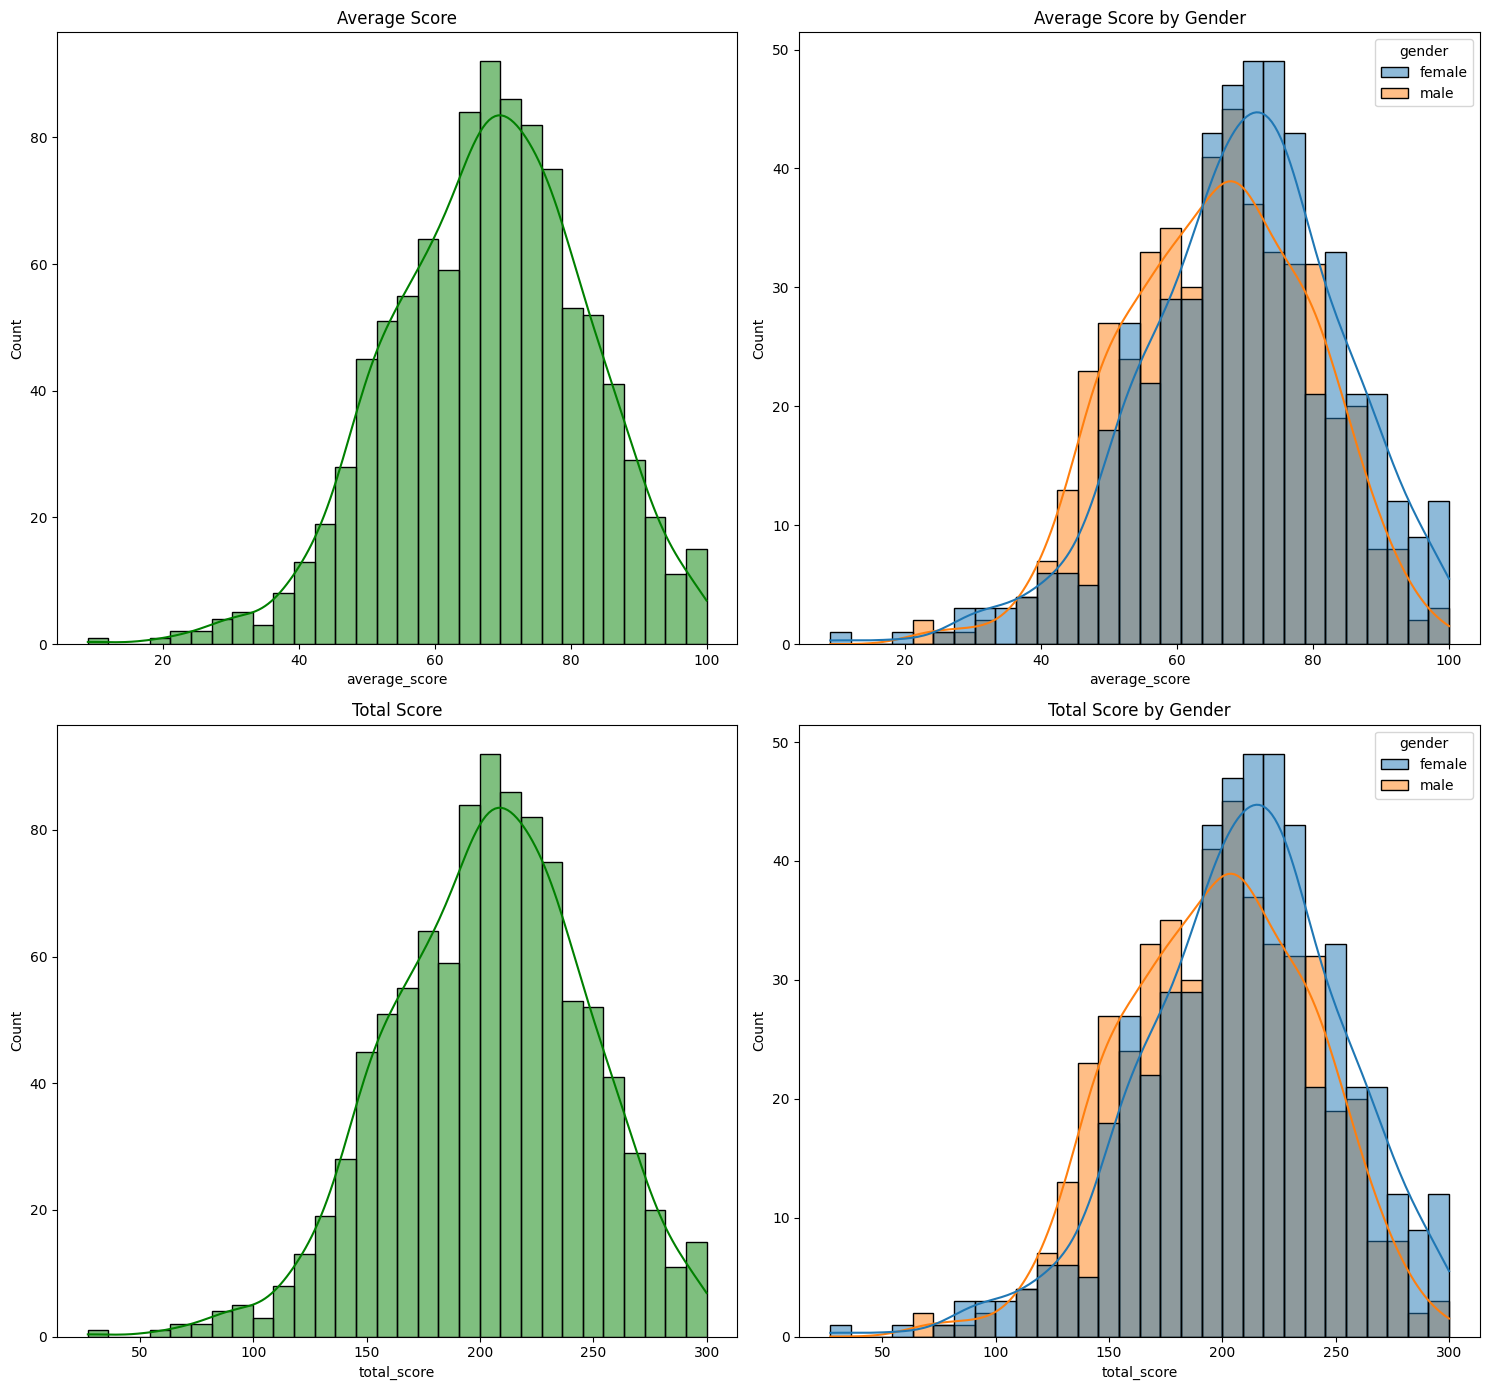

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(15, 14))

sns.histplot(data=df, x="average_score", bins=30, kde=True, color='g', ax=axs[0, 0])
axs[0, 0].set_title("Average Score")
sns.histplot(data=df, x="average_score", bins=30, kde=True, hue='gender', ax=axs[0, 1])
axs[0, 1].set_title("Average Score by Gender")
sns.histplot(data=df, x="total_score", bins=30, kde=True, color='g', ax=axs[1, 0])
axs[1, 0].set_title("Total Score")
sns.histplot(data=df, x="total_score", bins=30, kde=True, hue='gender', ax=axs[1, 1])
axs[1, 1].set_title("Total Score by Gender")

plt.tight_layout()
plt.show()

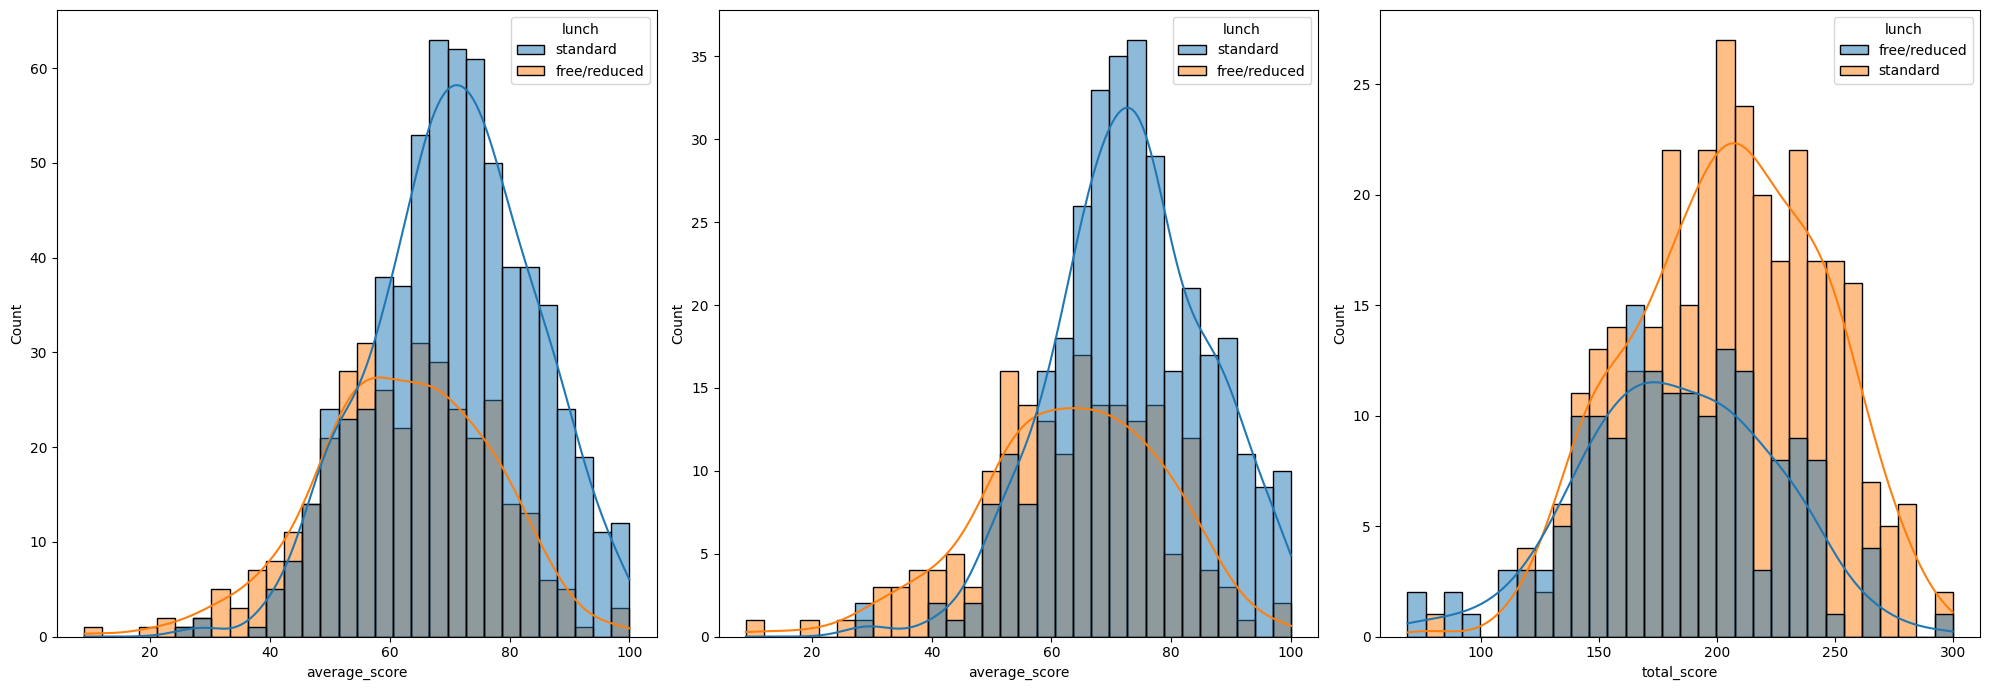

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(20, 7))

sns.histplot(data=df, x="average_score", bins=30, kde=True, hue='lunch', ax=axs[0])
sns.histplot(data=df[df.gender=='female'], x="average_score", bins=30, kde=True, hue='lunch', ax=axs[1])
sns.histplot(data=df[df.gender=='male'], x="total_score", bins=30, kde=True, hue='lunch', ax=axs[2])

plt.tight_layout()
plt.show()

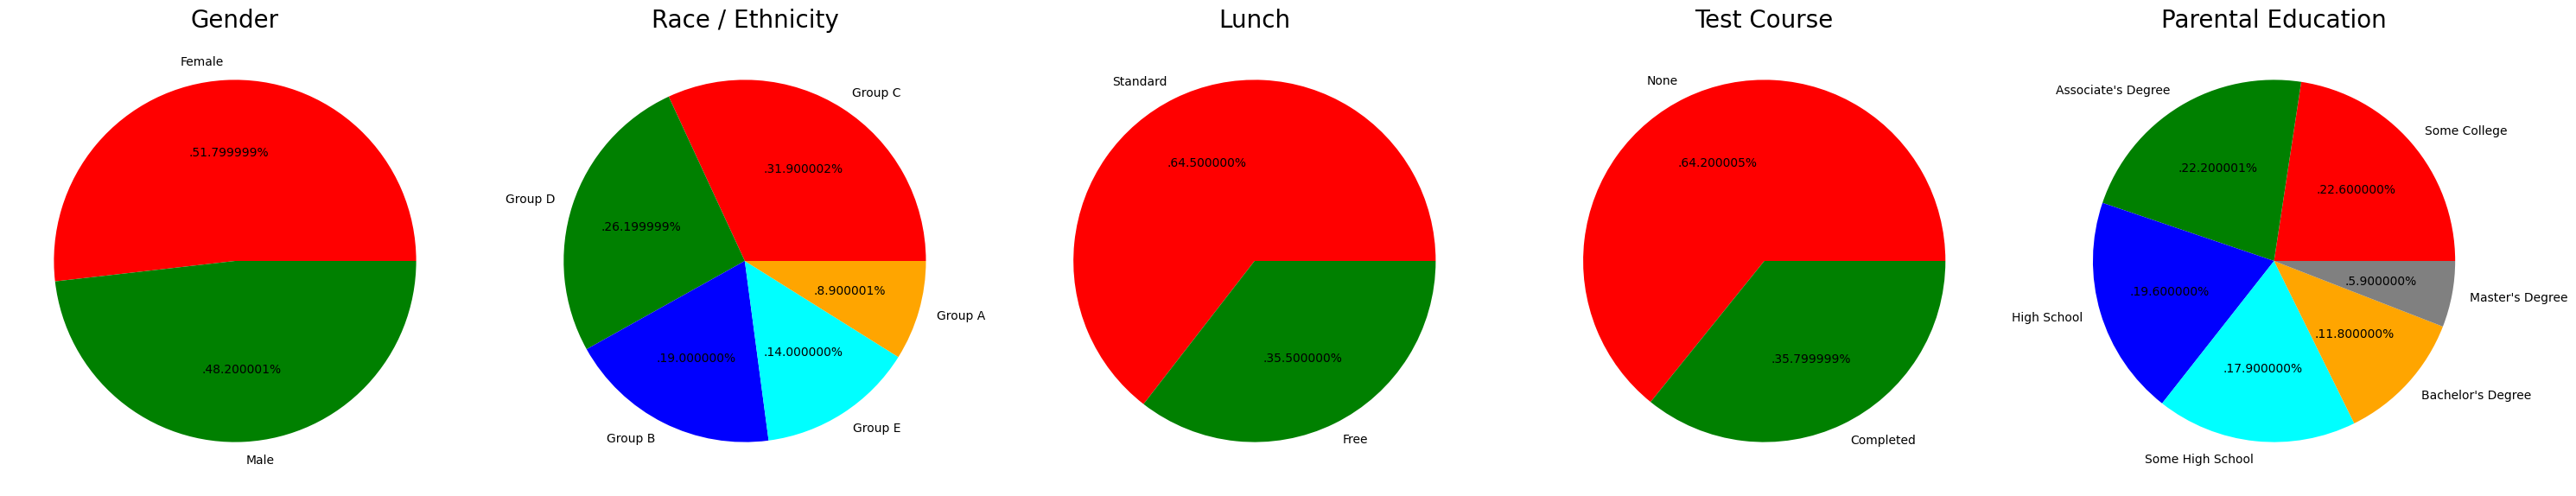

In [13]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race / Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()